In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)

***Fecha de entrega de consigna: 9/4/2021 en horario de clase***

***Fecha de entrega de resolución: 20/4/2021 a las 23:55 PM***

# Consigna


En la segunda clase de la materia mencionamos brevemente el modelo OCEAN de la personalidad, también conocido como "Big 5" (los cinco grandes). Este modelo se basa en hacer una serie de preguntas y luego separar las respuestas en dominios o dimensiones diferentes, de acuerdo a las correlaciones que existen en las respuestas. Este procedimiento se repite muchas veces en distintas poblaciones de sujetos, hasta que se encuentra el mínimo número de dimensiones que sirven para reproducir aceptablemente los datos. Luego, a partir de las preguntas que se asocian a cada una de las dimensiones, se interpreta lo que significa cada una de ellas en términos que sean intuitivos para lo que nosotros entendemos como personalidad.

Las primeras cuatro dimensiones de personalidad que fueron aceptadas son las siguientes:

1.   **Agradabilidad**. Una medida del comportamiento pro-social de los individuos y de su actitud empática y preocupación por los demás.
2.  **Extroversión**. Grado de comportamiento social. Los individuos con valores altos de esta dimensión suelen ser energéticas y positivas.
3.   **Responsabilidad**. Capacidad para cumplir objetivos y tareas y mantener la prolijidad y el orden.
5.   **Neuroticismo**. Personas con valores altos en esta dimensión suelen preocuparse fácilmente por cosas y sufrir de ansiedad y de pensamientos negativos.

Resulta ser que estas cuatro dimensiones no parecen ser suficientes para describir adecuadamente la personalidad humana: es necesario agregar una nueva dimensión, la cual es comparativamente menos importante a la hora de reproducir los datos, pero no por eso deja de ser necesaria. La dimensión faltante es algo más abstracta y difícil de interpretar que las anteriores. En las etapas tempranas del modelo OCEAN, los investigadores se dieron cuenta de que aquellas personas con valores altos de esta quinta dimensión eran más propensas a haber consumido marihuana u otras drogas en los campus universitarios de Estados Unidos, y por lo tanto que eran más abiertas a tener experiencias con drogas. Este es precisamente el motivo por el cual se denominó a esta quinta dimensión "**apertura a la experiencia**" (o más sucintamente, "apertura").

Las personas con valores altos de apertura tienden a desear nuevas experiencias y a tomar más riesgos para tenerlas, además suelen ser personas más creativas e intuitivas. La variable apertura se relaciona con posiciones políticas (aquellos con valores altos de apertura tienden a tener ideología liberal) y a tener mayor grado auto-reportado de felicidad y de pensamientos positivos. Además, la dimensión apertura se relaciona con la disponibilidad del neurotransmisor serotonina en el cerebro, es altamente heredable, y hasta afecta la percepción conciente del mundo, por ejemplo, las personas con valores altos de apertura tienen menos dificultad para percibir de forma simultánea estímulos que son mutuamente contradictorios:

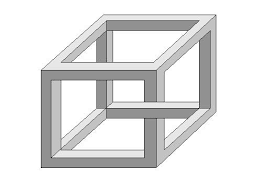


---


En esta ejercitación vamos a investigar la relación que existe entre personalidad y consumo de sustancias. Para eso vamos a necesitar los datasets de OCEAN y Coronadelicos.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1er paso

Cargo el dataframe de OCEAN

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv'
f = open(filename, 'r')
df_ocean = pd.read_csv(f)

Cargo el dataframe de Coronadelicos

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv'
f = open(filename, 'r')
df_coron = pd.read_csv(f)

Los uno en un único dataframe usando la columna 'hash' y descartando sujetos que no participaron del experimento.  
**Preguntar**: Por qué no funciona con set_index?

In [ ]:
df = pd.merge(df_ocean, df_coron, how='inner', on='hash')


# 2do paso

Sujetos que reportaron haber consumido marihuana al menos una vez.

In [ ]:
indices = df.index[df['7_marihuana'] != -999]
df_marihuana = df.loc[indices]

Sujetos que nunca consumieron marihuana.

In [ ]:
indices = df.index[df['7_marihuana'] == -999]
df_no_marihuana = df.loc[indices]

Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.

In [ ]:
indices = df.index[df['7_antidepresivos o antipsicoticos'] != -999]
df_anti = df.loc[indices]

# 3er paso

Armo nuevos dataframes que contengan las 5 dimensiones para cada uno de los sujetos (marihuana, no marihuana y antidepresivos/antipsicóticos).



In [ ]:
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']

df_marihuana_5 = df_marihuana[columnas].copy()
df_no_marihuana_5 = df_no_marihuana[columnas].copy()
df_anti_5 = df_anti[columnas].copy()

# 4to paso

Armo un radar plot, donde las 5 dimensiones sean O,C,E,A,N y se muestran en distintos colores los valores primedios de cada dimensión de cada grupo.

In [ ]:
def radar_plot(df, title = '',):
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid', label = row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)

Armo el dataframe que le voy a pasar a la función que arma el radar plot.

In [ ]:
max = 50
norm_marihuana = df_marihuana_5.mean() / max
norm_no_marihuana = df_no_marihuana_5.mean() / max
norm_anti = df_anti_5.mean() / max

In [ ]:
columns = ['Extraversión', 'Amabilidad', 'Responsabilidad', 'Neuroticismo', 'Apertura a la experiencia']
index = ['Marihuana', 'No Marihuana', 'Drogas de prescripción']

df_radar_plot = pd.DataFrame(columns=columns, index=index)
for i in range(len(norm_marihuana)):
  df_radar_plot.iloc[0, i] = norm_marihuana[i]
  df_radar_plot.iloc[1, i] = norm_no_marihuana[i]
  df_radar_plot.iloc[2, i] = norm_anti[i]

df_radar_plot

,Extraversión,Amabilidad,Responsabilidad,Neuroticismo,Apertura a la experiencia
Marihuana,0.51692,0.651513,0.586036,0.520471,0.778364
No Marihuana,0.510727,0.657839,0.621257,0.516647,0.758173
Drogas de prescripción,0.503261,0.643841,0.57128,0.58942,0.785483


Armo el radar plot.

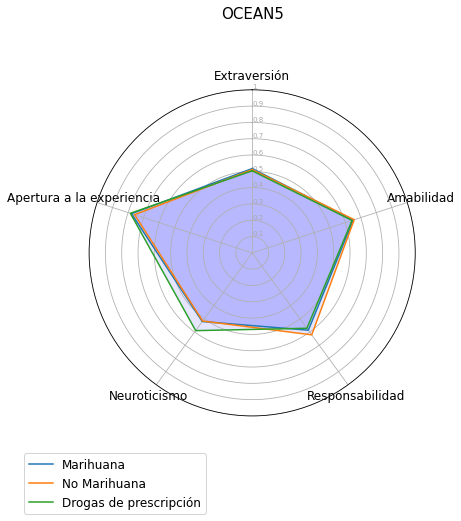

In [ ]:
radar_plot(df_radar_plot, title='OCEAN5')

1.   Los consumidores de marihuana tienen menos responsabilidad que los no consumidores. La apertura a la experiencia es ligeramente mayor en los consumidores de marihuana. El resto de las dimensiones se parecen bastante.
2.   Las personas que han reportado consumir drogas de prescripción tiene un neuroticismo mayor a las que no. Tienen una apertura a la experiencia similar a los consumidores de marihuana. No hay diferencias notables en el resto de las dimensiones.



# 5to paso

Me armo un dataframe con los datos de las personas que toman drogas de prescripción y con las que fuman marihuana y me armo un histograma para comparar sus diferencias.

In [ ]:
aux_m = df_marihuana_5.copy()
aux_a = df_anti_5.copy()

aux_m['Grupo'] = 'Marihuana'
aux_a['Grupo'] = 'Drogas de prescripción'

df2 = aux_m.append(aux_a, ignore_index=True)

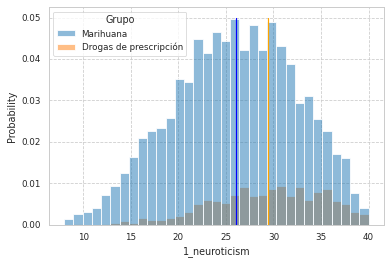

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_context("paper", font_scale = 1)
sbn.set_style("whitegrid", rc = {'grid.linestyle':'--'})

sbn.histplot(data=df2, x='1_neuroticism', hue='Grupo', stat="probability", common_norm=)

mean_m = df_marihuana_5['1_neuroticism'].mean()
plt.plot([mean_m,mean_m], [0,0.05], color = 'blue')

mean_a = df_anti_5['1_neuroticism'].mean()
plt.plot([mean_a,mean_a], [0,0.05], color = 'orange')

# 6to paso

Me armo una función Cohen para calcular la magnitud.

In [ ]:
from scipy.stats import pearsonr
x1 = df_marihuana_5['1_neuroticism'].mean()
x2 = df_anti_5['1_neuroticism'].mean()
s1 = df_marihuana_5['1_neuroticism'].std()
s2 = df_anti_5['1_neuroticism'].std()

def cohen(x1, x2, s1, s2):
  return (x1 - x2) / ((s1**2 + s2**2) / 2)**0.5

magnitud = abs(cohen(x1, x2, s1, s2))

In [ ]:
magnitud

0.5465300791564619

La magnitud es mediana.